In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# df_model_list = pd.read_csv('model_list.csv')

# df_model_list

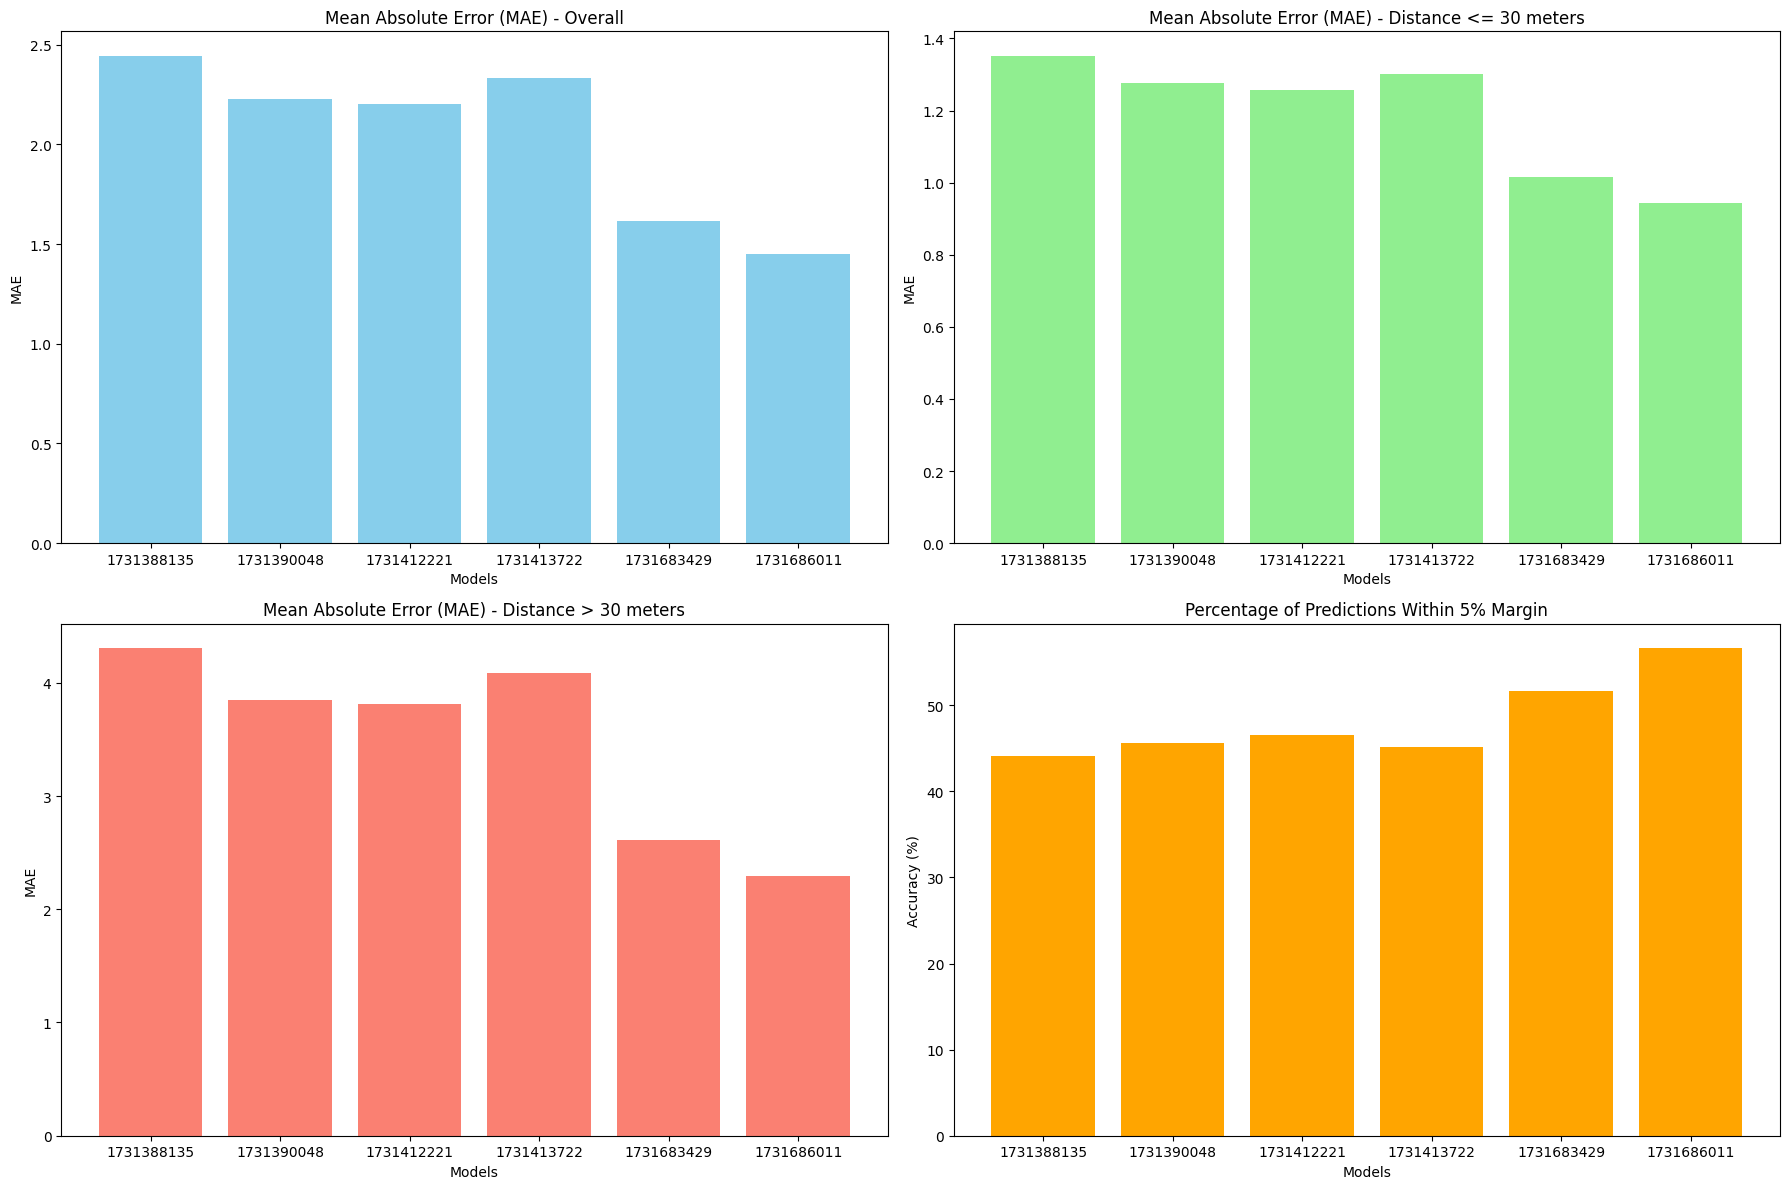

Best overall model: 1731686011
Best model for distance <= 30 meters: 1731686011
Best model for distance > 30 meters: 1731686011
Best model within 5% margin accuracy: 1731686011


In [3]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # List of file paths for each predictions file
# prediction_files = [f'distance-estimator/data/predictions{i}.csv' for i in range(1, 8)]
# model_names = [f'Model {i}' for i in range(1, 8)]

# # Initialize lists to store accuracy results
# mae_below_30 = []
# mae_above_30 = []
# mae_overall = []

# for file in prediction_files:
#     # Load the predictions data
#     df = pd.read_csv(file)

#     # Calculate Mean Absolute Error (MAE) for each distance range
#     df['error'] = abs(df['zloc'] - df['zloc_pred'])

#     # Overall MAE
#     mae_overall.append(df['error'].mean())

#     # MAE for distances below and above 30 meters
#     mae_below_30.append(df[df['zloc'] <= 30]['error'].mean())
#     mae_above_30.append(df[df['zloc'] > 30]['error'].mean())

# # Plotting the results in a 1-row, 3-column grid
# fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# # Overall MAE for each model
# ax[0].bar(model_names, mae_overall, color='skyblue')
# ax[0].set_title('Mean Absolute Error (MAE) - Overall')
# ax[0].set_ylabel('MAE')
# ax[0].set_xlabel('Models')

# # MAE for distances below 30 meters
# ax[1].bar(model_names, mae_below_30, color='lightgreen')
# ax[1].set_title('Mean Absolute Error (MAE) - Distance <= 30 meters')
# ax[1].set_ylabel('MAE')
# ax[1].set_xlabel('Models')

# # MAE for distances above 30 meters
# ax[2].bar(model_names, mae_above_30, color='salmon')
# ax[2].set_title('Mean Absolute Error (MAE) - Distance > 30 meters')
# ax[2].set_ylabel('MAE')
# ax[2].set_xlabel('Models')

# plt.tight_layout()
# plt.show()

# # Identify the best models
# best_overall = model_names[mae_overall.index(min(mae_overall))]
# best_below_30 = model_names[mae_below_30.index(min(mae_below_30))]
# best_above_30 = model_names[mae_above_30.index(min(mae_above_30))]

# print(f"Best overall model: {best_overall}")
# print(f"Best model for distance <= 30 meters: {best_below_30}")
# print(f"Best model for distance > 30 meters: {best_above_30}")


# # List of file paths for each predictions file
# prediction_files = [
#     'distance-estimator/data/predictions_1731385763.csv',
#     'distance-estimator/data/predictions_1731388135.csv',
#     'distance-estimator/data/predictions_1731388730.csv',
#     'distance-estimator/data/predictions_1731390048.csv',
#     'distance-estimator/data/predictions_1731412221.csv',
#     'distance-estimator/data/predictions_1731413722.csv'
# ]

# # List of file paths for each predictions file
# model_id = [
#     '1731385763',
#     '1731388135',
#     '1731388730',
#     '1731390048',
#     '1731412221',
#     '1731413722'
# ]

# List of file paths for each predictions file
prediction_files = [
    'distance-estimator/data/predictions_1731388135.csv',
    'distance-estimator/data/predictions_1731390048.csv',
    'distance-estimator/data/predictions_1731412221.csv',
    'distance-estimator/data/predictions_1731413722.csv',
    'distance-estimator/data/predictions_1731683429.csv',
    'distance-estimator/data/predictions_1731686011.csv',
]

# List of file paths for each predictions file
model_id = [
    '1731388135',
    '1731390048',
    '1731412221',
    '1731413722',
    '1731683429',
    '1731686011'
]

model_names = [f'{i}' for i in model_id]

# Initialize lists to store accuracy results
mae_below_30 = []
mae_above_30 = []
mae_overall = []
accuracy_within_5_percent = []

for file in prediction_files:
    # Load the predictions data
    df = pd.read_csv(file)

    # Calculate Mean Absolute Error (MAE) for each distance range
    df['error'] = abs(df['zloc'] - df['zloc_pred'])

    # Overall MAE
    mae_overall.append(df['error'].mean())

    # MAE for distances below and above 30 meters
    mae_below_30.append(df[df['zloc'] <= 30]['error'].mean())
    mae_above_30.append(df[df['zloc'] > 30]['error'].mean())

    # Calculate percentage of predictions within 5% margin
    df['within_5_percent'] = abs(df['zloc'] - df['zloc_pred']) / df['zloc'] <= 0.05
    accuracy_within_5_percent.append(df['within_5_percent'].mean() * 100)  # Convert to percentage

# Plotting the results in a 2-row, 2-column grid
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Overall MAE for each model
ax[0, 0].bar(model_names, mae_overall, color='skyblue')
ax[0, 0].set_title('Mean Absolute Error (MAE) - Overall')
ax[0, 0].set_ylabel('MAE')
ax[0, 0].set_xlabel('Models')

# MAE for distances below 30 meters
ax[0, 1].bar(model_names, mae_below_30, color='lightgreen')
ax[0, 1].set_title('Mean Absolute Error (MAE) - Distance <= 30 meters')
ax[0, 1].set_ylabel('MAE')
ax[0, 1].set_xlabel('Models')

# MAE for distances above 30 meters
ax[1, 0].bar(model_names, mae_above_30, color='salmon')
ax[1, 0].set_title('Mean Absolute Error (MAE) - Distance > 30 meters')
ax[1, 0].set_ylabel('MAE')
ax[1, 0].set_xlabel('Models')

# 5% Margin Accuracy for each model
ax[1, 1].bar(model_names, accuracy_within_5_percent, color='orange')
ax[1, 1].set_title('Percentage of Predictions Within 5% Margin')
ax[1, 1].set_ylabel('Accuracy (%)')
ax[1, 1].set_xlabel('Models')

plt.tight_layout()
plt.show()

# Identify the best models
best_overall = model_names[mae_overall.index(min(mae_overall))]
best_below_30 = model_names[mae_below_30.index(min(mae_below_30))]
best_above_30 = model_names[mae_above_30.index(min(mae_above_30))]
best_within_5_percent = model_names[accuracy_within_5_percent.index(max(accuracy_within_5_percent))]

print(f"Best overall model: {best_overall}")
print(f"Best model for distance <= 30 meters: {best_below_30}")
print(f"Best model for distance > 30 meters: {best_above_30}")
print(f"Best model within 5% margin accuracy: {best_within_5_percent}")



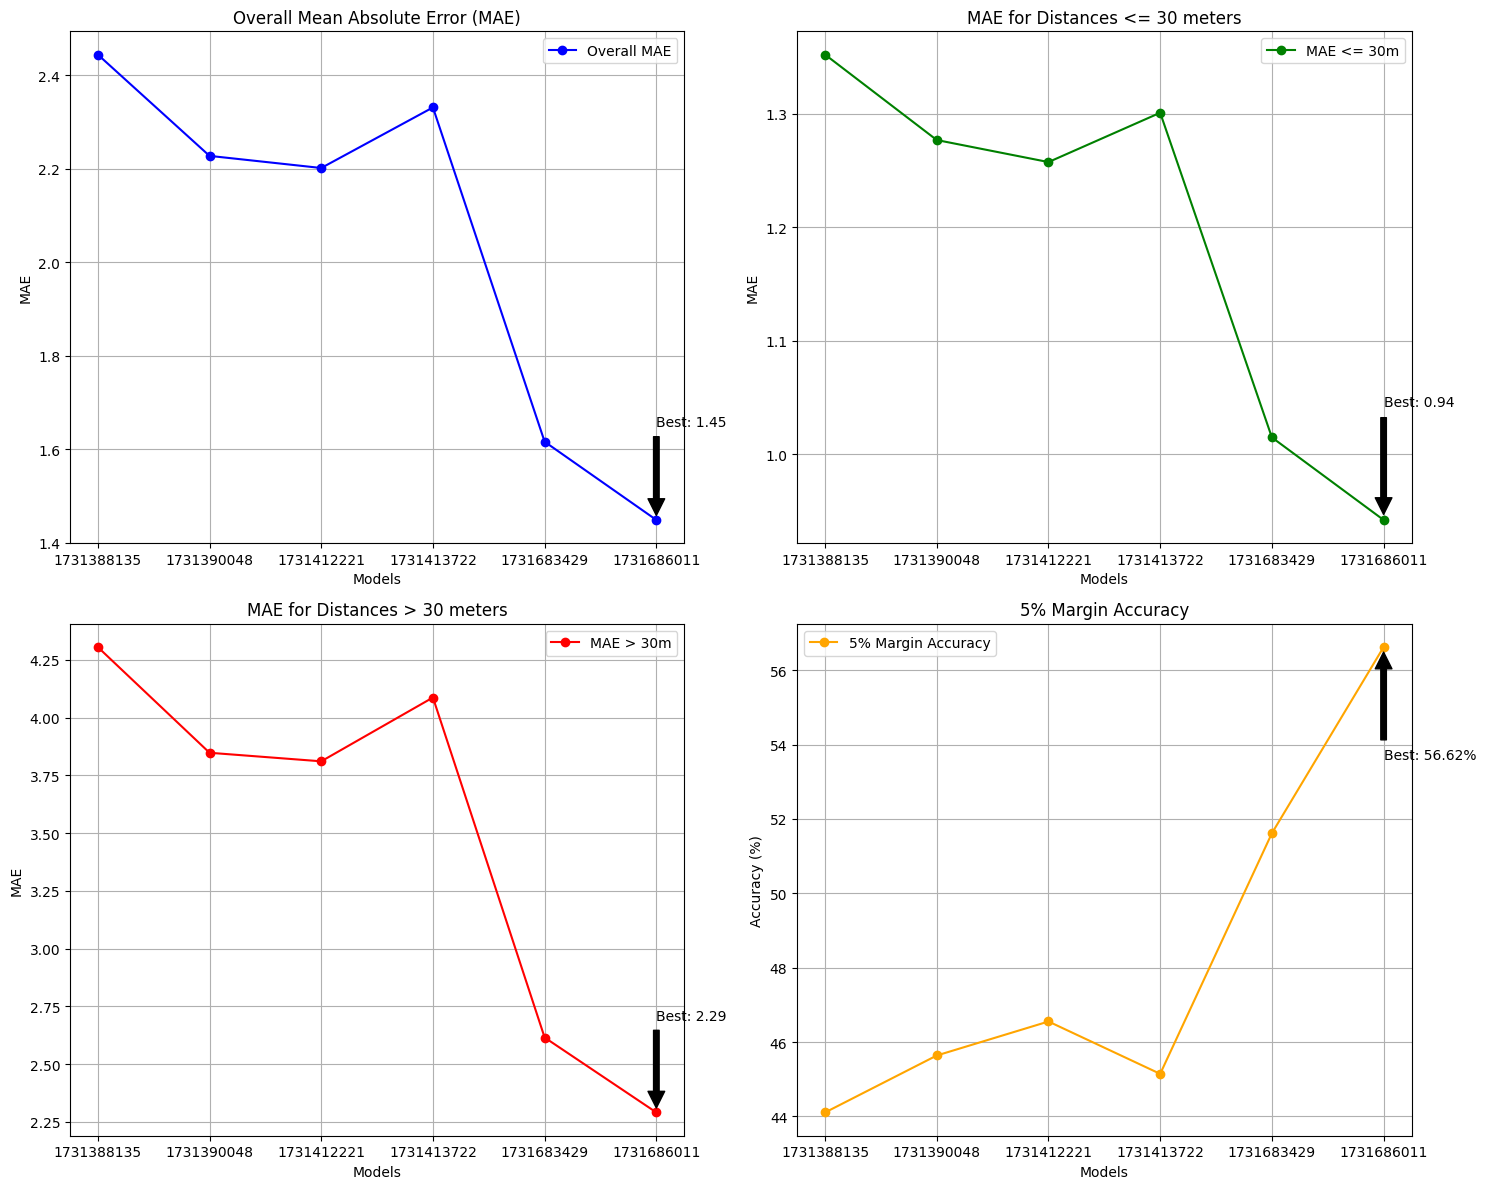

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize lists to store accuracy results
mae_below_30 = []
mae_above_30 = []
mae_overall = []
accuracy_within_5_percent = []

for file in prediction_files:
    # Load the predictions data
    df = pd.read_csv(file)

    # Calculate Mean Absolute Error (MAE) for each distance range
    df['error'] = abs(df['zloc'] - df['zloc_pred'])

    # Overall MAE
    mae_overall.append(df['error'].mean())

    # MAE for distances below and above 30 meters
    mae_below_30.append(df[df['zloc'] <= 30]['error'].mean())
    mae_above_30.append(df[df['zloc'] > 30]['error'].mean())

    # Calculate percentage of predictions within 5% margin
    df['within_5_percent'] = abs(df['zloc'] - df['zloc_pred']) / df['zloc'] <= 0.05
    accuracy_within_5_percent.append(df['within_5_percent'].mean() * 100)  # Convert to percentage

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Overall MAE
axs[0, 0].plot(model_names, mae_overall, marker='o', color='b', label="Overall MAE")
axs[0, 0].set_title('Overall Mean Absolute Error (MAE)')
axs[0, 0].set_xlabel('Models')
axs[0, 0].set_ylabel('MAE')
axs[0, 0].grid(True)
axs[0, 0].legend()
best_overall = min(mae_overall)
best_index_overall = mae_overall.index(best_overall)
axs[0, 0].annotate(f'Best: {best_overall:.2f}', xy=(best_index_overall, best_overall), 
                   xytext=(best_index_overall, best_overall + 0.2),
                   arrowprops=dict(facecolor='black', shrink=0.05))

# MAE for distances <= 30 meters
axs[0, 1].plot(model_names, mae_below_30, marker='o', color='g', label="MAE <= 30m")
axs[0, 1].set_title('MAE for Distances <= 30 meters')
axs[0, 1].set_xlabel('Models')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].grid(True)
axs[0, 1].legend()
best_below_30 = min(mae_below_30)
best_index_below_30 = mae_below_30.index(best_below_30)
axs[0, 1].annotate(f'Best: {best_below_30:.2f}', xy=(best_index_below_30, best_below_30), 
                   xytext=(best_index_below_30, best_below_30 + 0.1),
                   arrowprops=dict(facecolor='black', shrink=0.05))

# MAE for distances > 30 meters
axs[1, 0].plot(model_names, mae_above_30, marker='o', color='r', label="MAE > 30m")
axs[1, 0].set_title('MAE for Distances > 30 meters')
axs[1, 0].set_xlabel('Models')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].grid(True)
axs[1, 0].legend()
best_above_30 = min(mae_above_30)
best_index_above_30 = mae_above_30.index(best_above_30)
axs[1, 0].annotate(f'Best: {best_above_30:.2f}', xy=(best_index_above_30, best_above_30), 
                   xytext=(best_index_above_30, best_above_30 + 0.4),
                   arrowprops=dict(facecolor='black', shrink=0.05))

# 5% Margin Accuracy
axs[1, 1].plot(model_names, accuracy_within_5_percent, marker='o', color='orange', label="5% Margin Accuracy")
axs[1, 1].set_title('5% Margin Accuracy')
axs[1, 1].set_xlabel('Models')
axs[1, 1].set_ylabel('Accuracy (%)')
axs[1, 1].grid(True)
axs[1, 1].legend()
best_within_5_percent = max(accuracy_within_5_percent)
best_index_within_5_percent = accuracy_within_5_percent.index(best_within_5_percent)
axs[1, 1].annotate(f'Best: {best_within_5_percent:.2f}%', xy=(best_index_within_5_percent, best_within_5_percent), 
                   xytext=(best_index_within_5_percent, best_within_5_percent - 3),
                   arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()


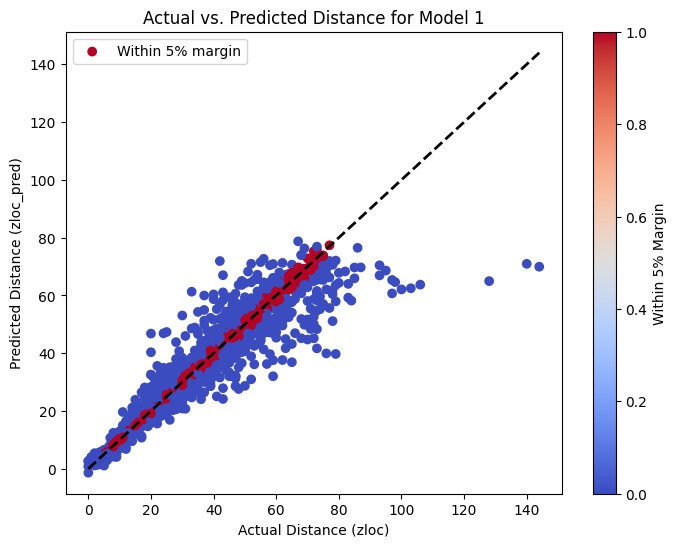

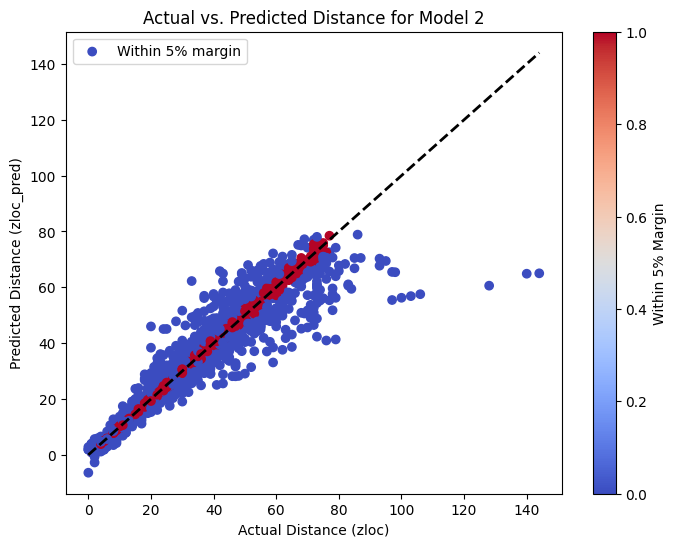

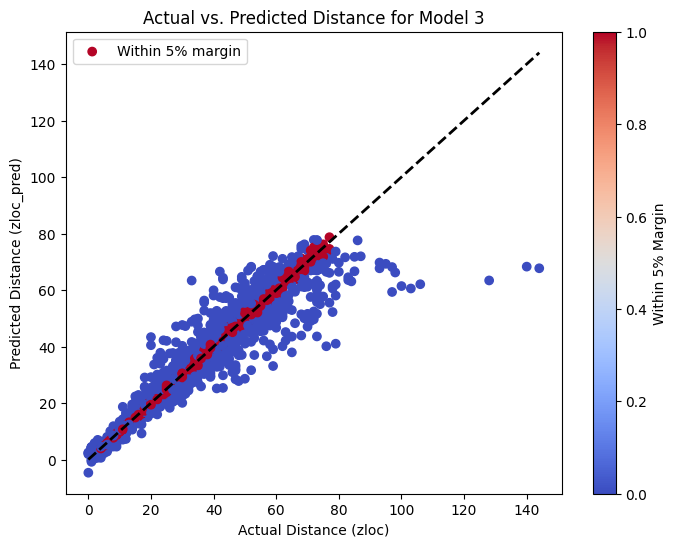

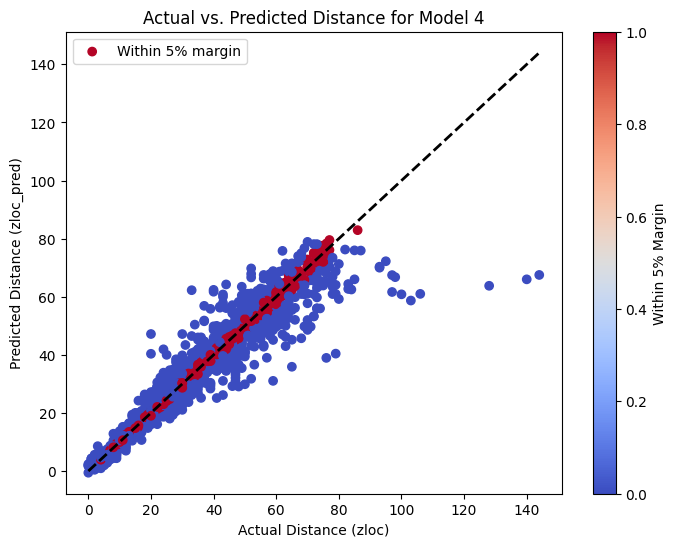

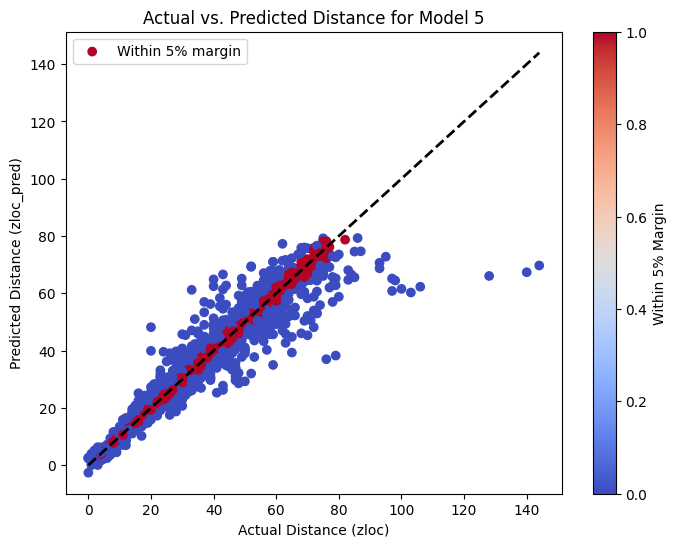

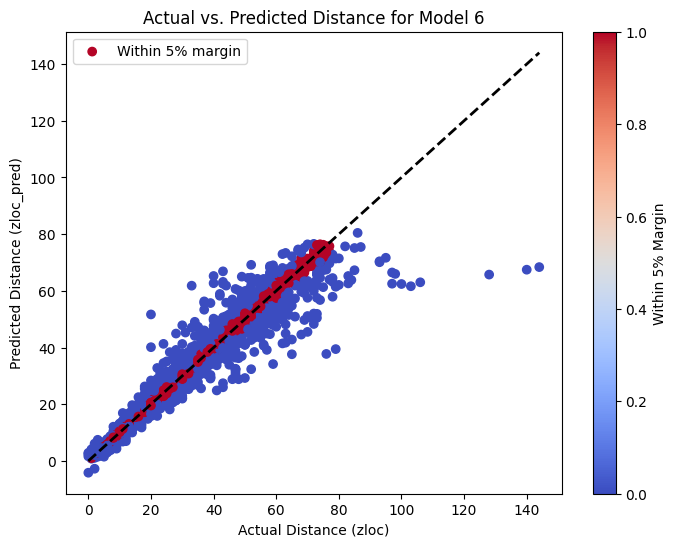

In [15]:
for file, model_name in zip(prediction_files, model_names):
    df = pd.read_csv(file)
    df['error'] = abs(df['zloc'] - df['zloc_pred']) / df['zloc'] * 100
    within_5_percent = df['error'] <= 5

    plt.figure(figsize=(8, 6))
    plt.scatter(df['zloc'], df['zloc_pred'], c=within_5_percent, cmap='coolwarm', label='Within 5% margin')
    plt.plot([df['zloc'].min(), df['zloc'].max()], [df['zloc'].min(), df['zloc'].max()], 'k--', lw=2)
    plt.colorbar(label="Within 5% Margin")
    plt.xlabel("Actual Distance (zloc)")
    plt.ylabel("Predicted Distance (zloc_pred)")
    plt.title(f"Actual vs. Predicted Distance for {model_name}")
    plt.legend()
    plt.show()

<Figure size 1000x600 with 0 Axes>

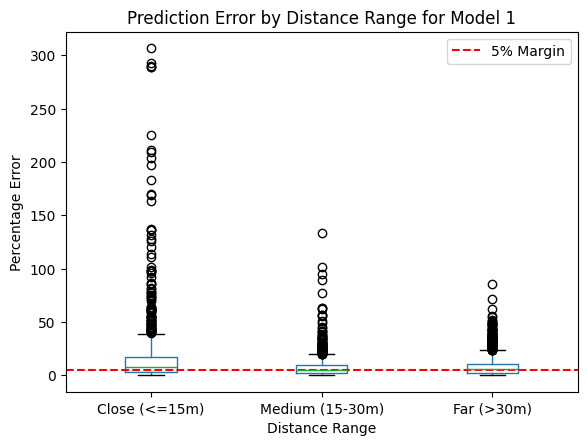

<Figure size 1000x600 with 0 Axes>

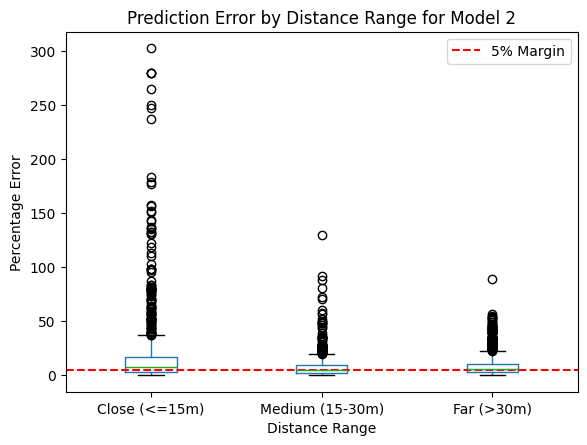

<Figure size 1000x600 with 0 Axes>

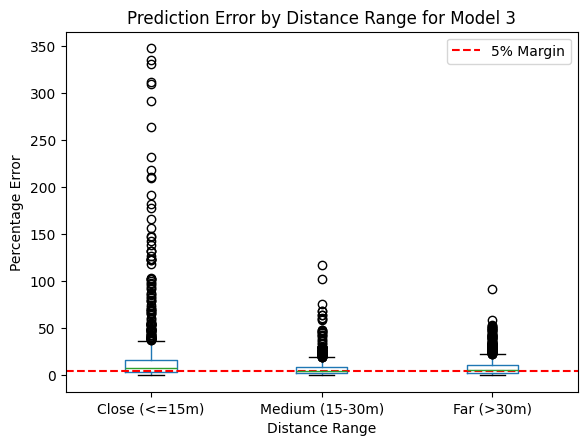

<Figure size 1000x600 with 0 Axes>

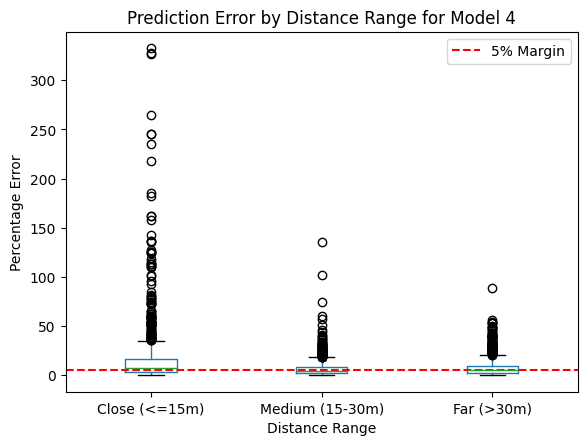

<Figure size 1000x600 with 0 Axes>

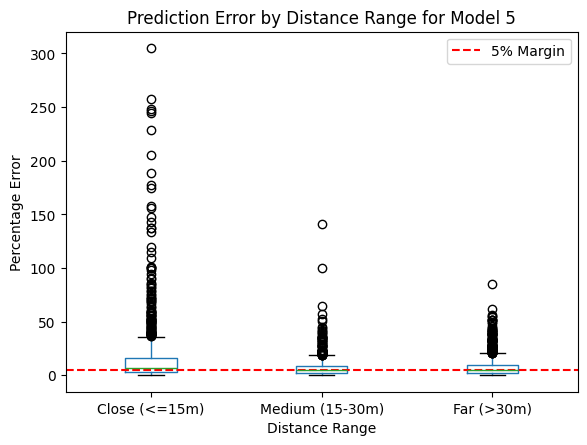

<Figure size 1000x600 with 0 Axes>

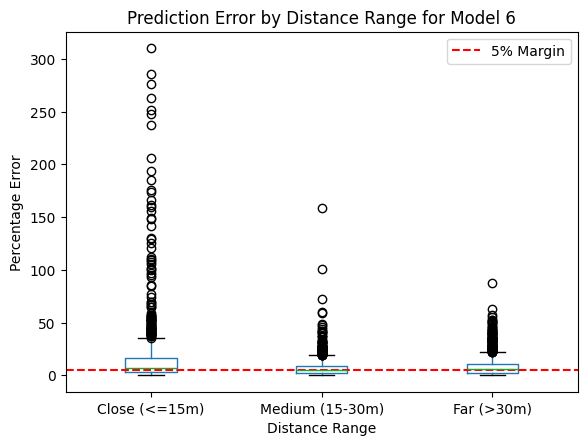

In [17]:
for file, model_name in zip(prediction_files, model_names):
    df = pd.read_csv(file)
    df['error'] = abs(df['zloc'] - df['zloc_pred']) / df['zloc'] * 100
    df['distance_range'] = pd.cut(df['zloc'], bins=[0, 15, 30, df['zloc'].max()], labels=['Close (<=15m)', 'Medium (15-30m)', 'Far (>30m)'])

    plt.figure(figsize=(10, 6))
    df.boxplot(column='error', by='distance_range', grid=False)
    plt.axhline(y=5, color='red', linestyle='--', label='5% Margin')
    plt.title(f"Prediction Error by Distance Range for {model_name}")
    plt.suptitle("")  # Remove the default title from boxplot
    plt.xlabel("Distance Range")
    plt.ylabel("Percentage Error")
    plt.legend()
    plt.show()


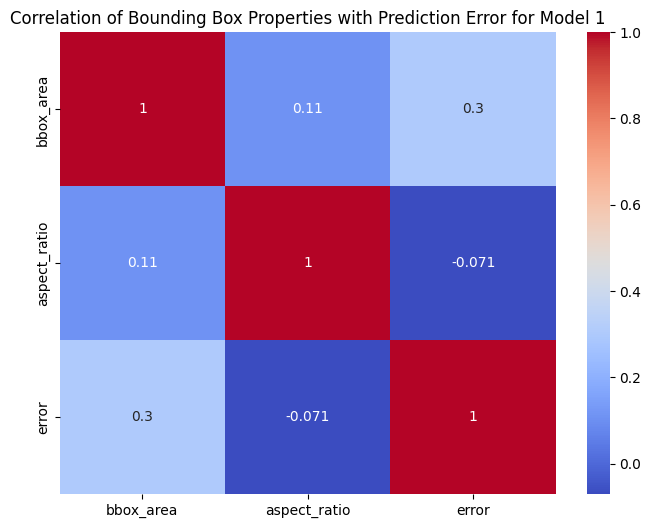

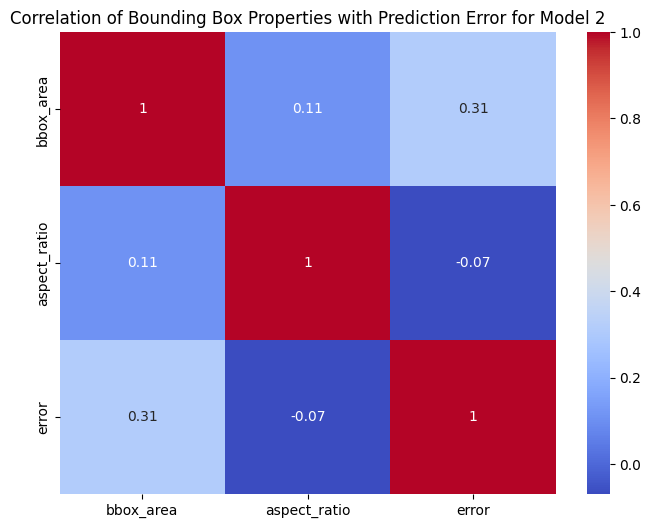

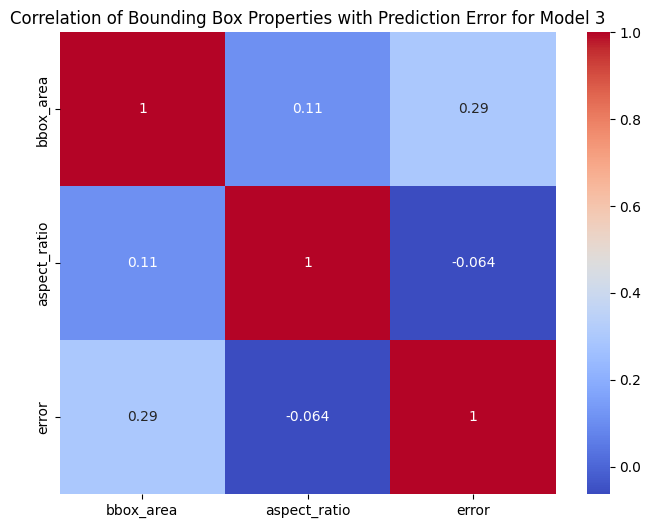

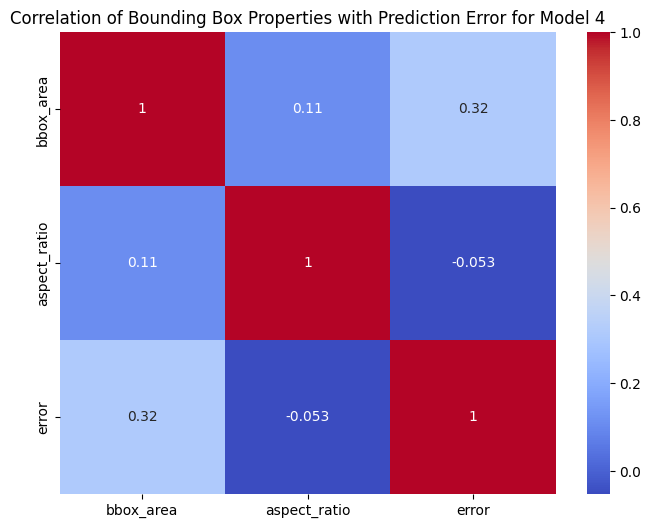

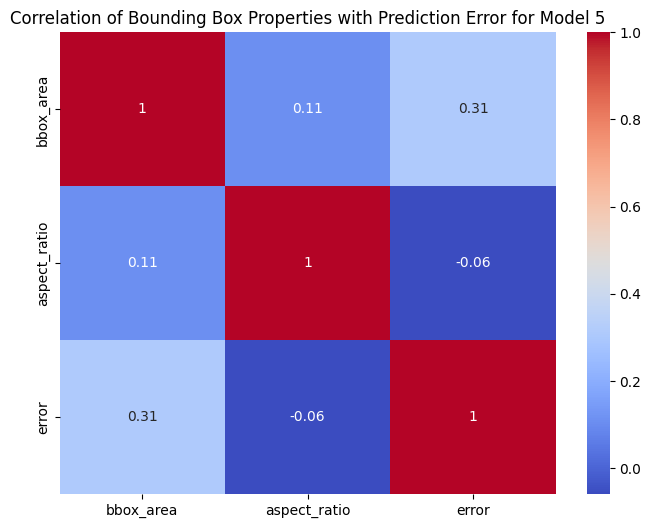

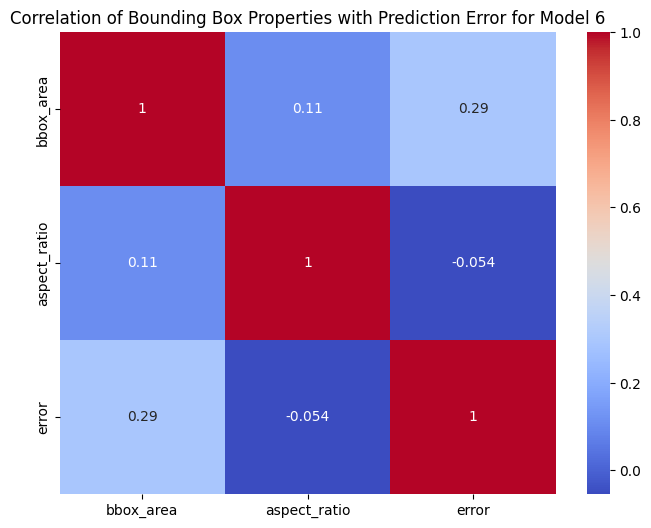

In [3]:
import seaborn as sns

for file, model_name in zip(prediction_files, model_names):
    df = pd.read_csv(file)
    df['error'] = abs(df['zloc'] - df['zloc_pred']) / df['zloc'] * 100
    df['bbox_area'] = (df['xmax'] - df['xmin']) * (df['ymax'] - df['ymin'])
    df['aspect_ratio'] = (df['xmax'] - df['xmin']) / (df['ymax'] - df['ymin'])
    correlation_data = df[['bbox_area', 'aspect_ratio', 'error']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
    plt.title(f"Correlation of Bounding Box Properties with Prediction Error for {model_name}")
    plt.show()


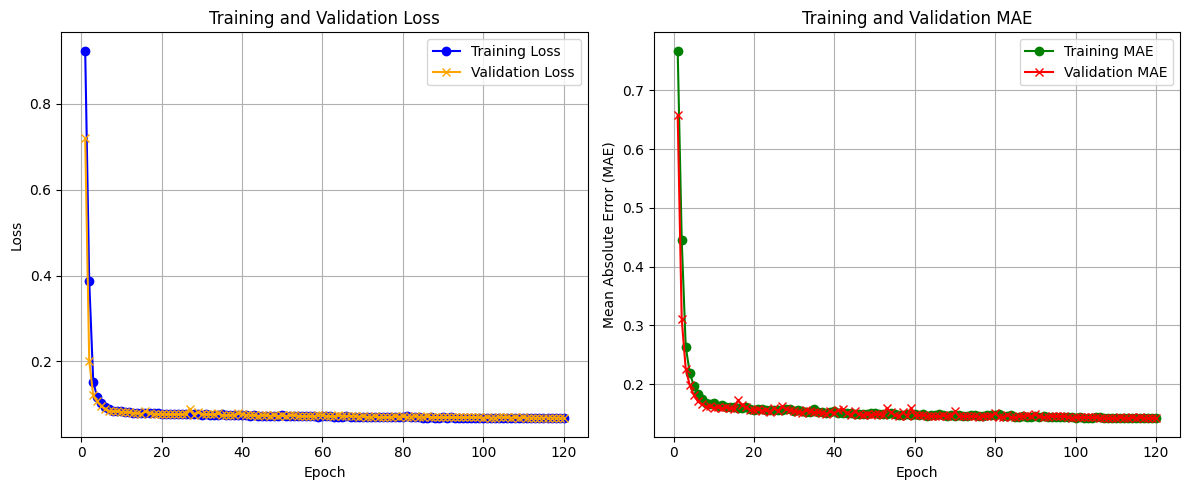

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data from CSV file
data = pd.read_csv('distance-estimator/generated_files/model@1731385763_training_log_1.csv')  # Replace with your actual file path

# Plot Loss and Validation Loss over epochs
plt.figure(figsize=(12, 5))

# Plot Loss vs. Val Loss
plt.subplot(1, 2, 1)
plt.plot(data['epoch'], data['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss', color='orange', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot MAE vs. Val MAE
plt.subplot(1, 2, 2)
plt.plot(data['epoch'], data['mae'], label='Training MAE', color='green', marker='o')
plt.plot(data['epoch'], data['val_mae'], label='Validation MAE', color='red', marker='x')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data from CSV file
data = pd.read_csv('distance-estimator/data/model@1731385763_training_log_1')  # Replace with your actual file path

# Plot Loss and Validation Loss over epochs
plt.figure(figsize=(12, 5))

# Plot Loss vs. Val Loss
plt.subplot(1, 2, 1)
plt.plot(data['epoch'], data['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss', color='orange', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot MAE vs. Val MAE
plt.subplot(1, 2, 2)
plt.plot(data['epoch'], data['mae'], label='Training MAE', color='green', marker='o')
plt.plot(data['epoch'], data['val_mae'], label='Validation MAE', color='red', marker='x')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'distance-estimator/data/model@1731385763_training_log_1'